# Testing assumptions for parametric Statistical Tests

1. Normality: Data have a normal distribution 
2. Homoscedasticity: Data from multiple groups have the same variance
3. Independence: Data are independent

## 1. Normality

### Visual methods: Histogram

[1] "mean:  -0.0362632239791053"
[1] "sd:  0.981324900106715"


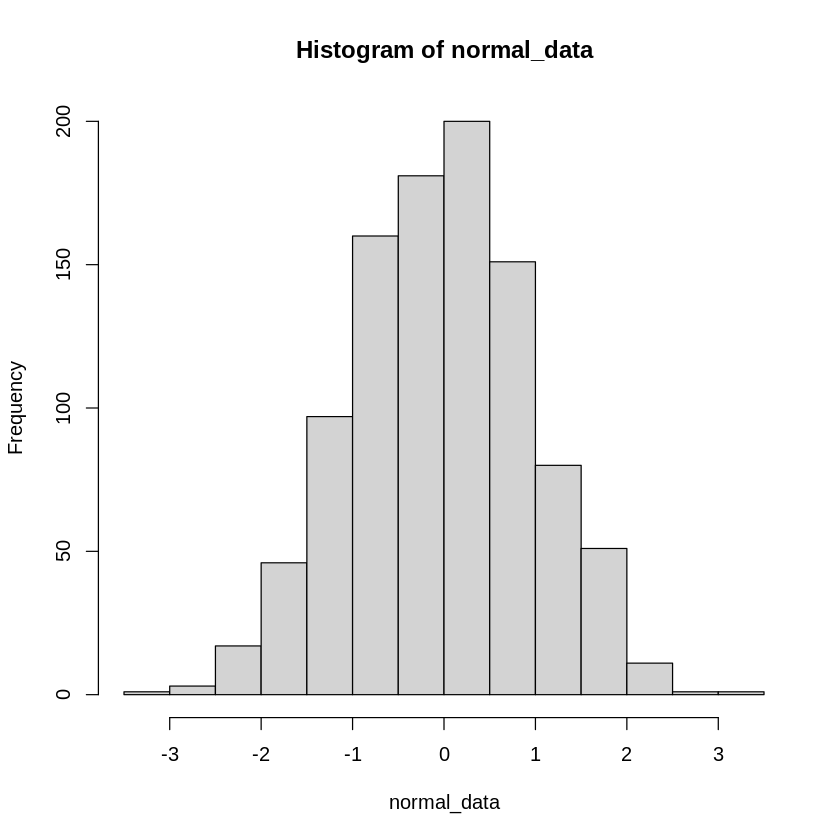

In [3]:
normal_data <- rnorm(1e3)
hist(normal_data)
print(paste('mean: ',  mean(normal_data)))
print(paste('sd: ', sd(normal_data)))

### Visual methods: Q-Q plot
<br>
Thoretical quantiles (N(0,1)) are plotted on the x-axes and ordered random variables from a tested sample on the y-axes.
Now we want to look at the ends of the formed curve, if the tested data comes from a normal distribution, the end should follow a diagonal line from the lower left corner to the upper right corner. 

[1] 585 677

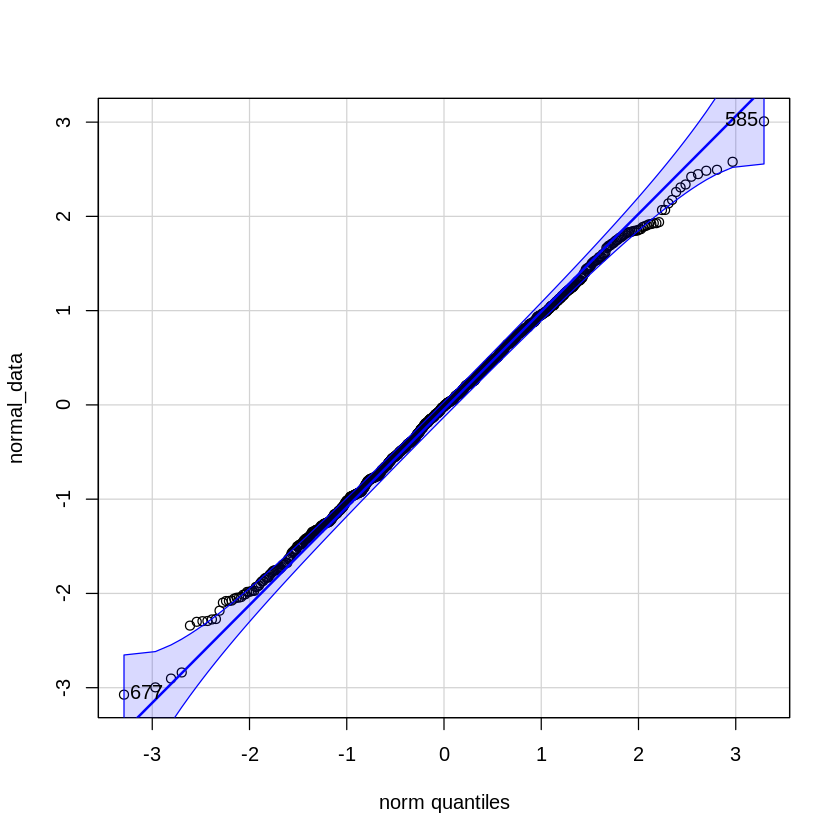

In [19]:
# install.packages('car')
# library('car')

qqPlot(normal_data)

In [44]:
install.packages('ggpubr')

library('ggplot2')
library('ggpubr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘corrplot’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’




**Example**

In [96]:
# functions

# plot two plots side by side
plot_hist_qq <- function(data){
  df <- data.frame(data)
  colnames(df) <- c('x')

  h_plot <- ggplot(df, aes(x=x)) + 
            geom_histogram(bins=20, fill="#69b3a2", color="#e9ecef", alpha=0.7, aes(y=..density..)) + 
            geom_density(color='#4a50e8', linewidth=1.1) + 
            stat_function(fun=dnorm, color='#e82a62', linewidth=2, args=list(mean=mean(df$x), sd=sd(df$x))) +
            labs(title="Histogram with density curve") +
            theme(plot.title=element_text(hjust=0.5))

  qq_plot <- ggplot(df, aes(sample=x)) + stat_qq_line(color='#69b3a2', linewidth=2) + stat_qq(size=3) + 
            labs(title="QQplot") +
            theme(plot.title=element_text(hjust=0.5))

  # put the plots into one figure
  figure <- ggarrange(h_plot, qq_plot,
                      labels=c("A", "B"),
                      ncol=2)
  return(figure)

}

# function to change the figure width and height ratio
fig <- function(width, heigth){
     options(repr.plot.width=width, repr.plot.height=heigth)
}

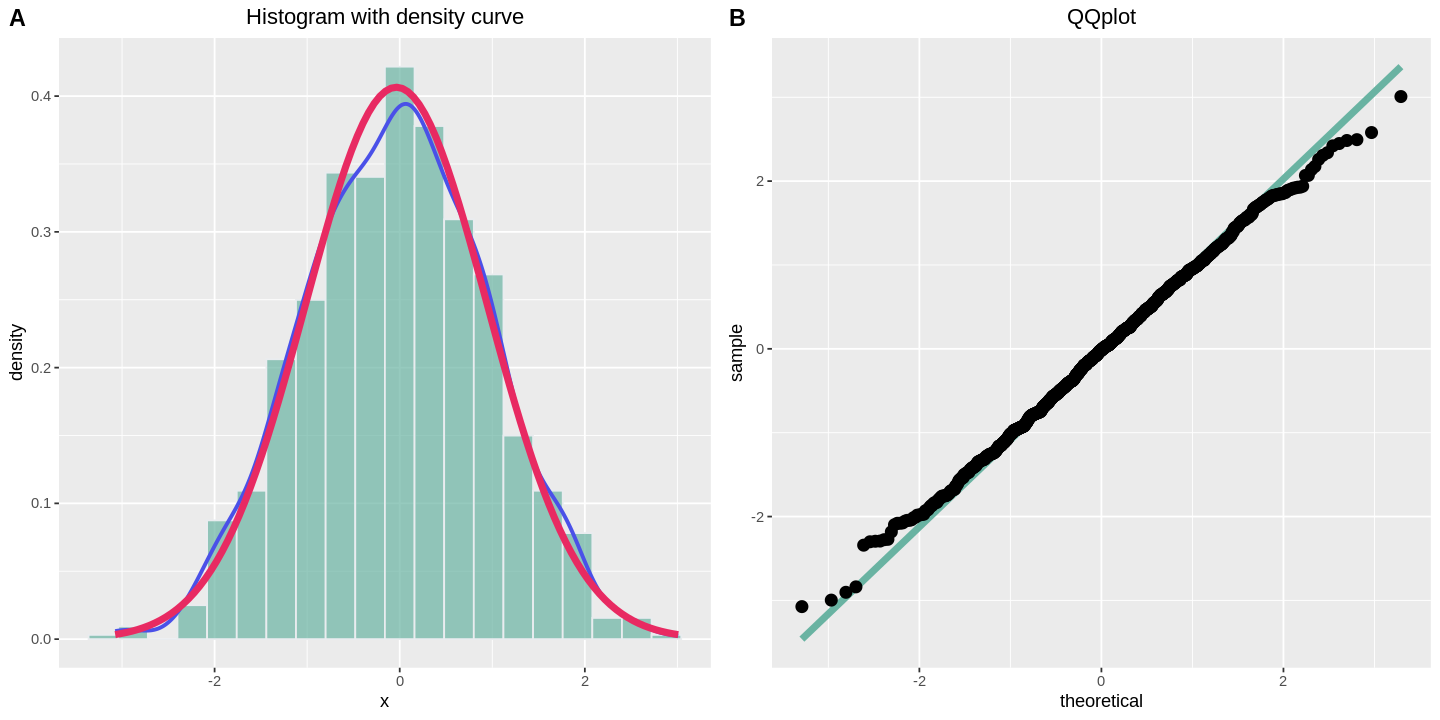

In [97]:
# change the figure width and height ratio
fig(12, 6)

# create plots
plot_hist_qq(normal_data)

**Exercise:**
<br>
1. Create a skewed dataset and then plot histogram and qq plot.
<br>
  Hint - https://stat.ethz.ch/R-manual/R-devel/library/stats/html/Beta.html
2. Create a dataset peaked in the middle and plot histogram and qq plot.

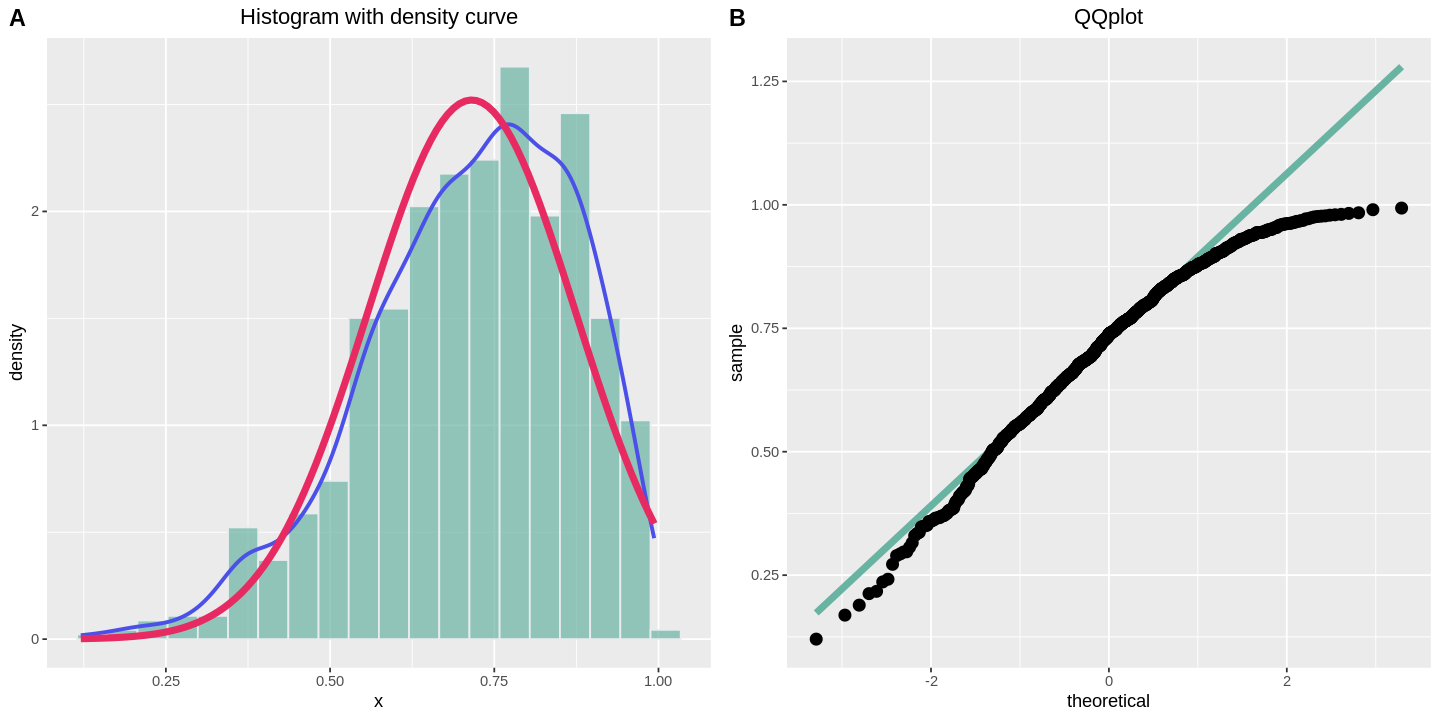

In [99]:
skewed_data <- rbeta(1e3, 5, 2)

fig(12, 6)
plot_hist_qq(skewed_data)

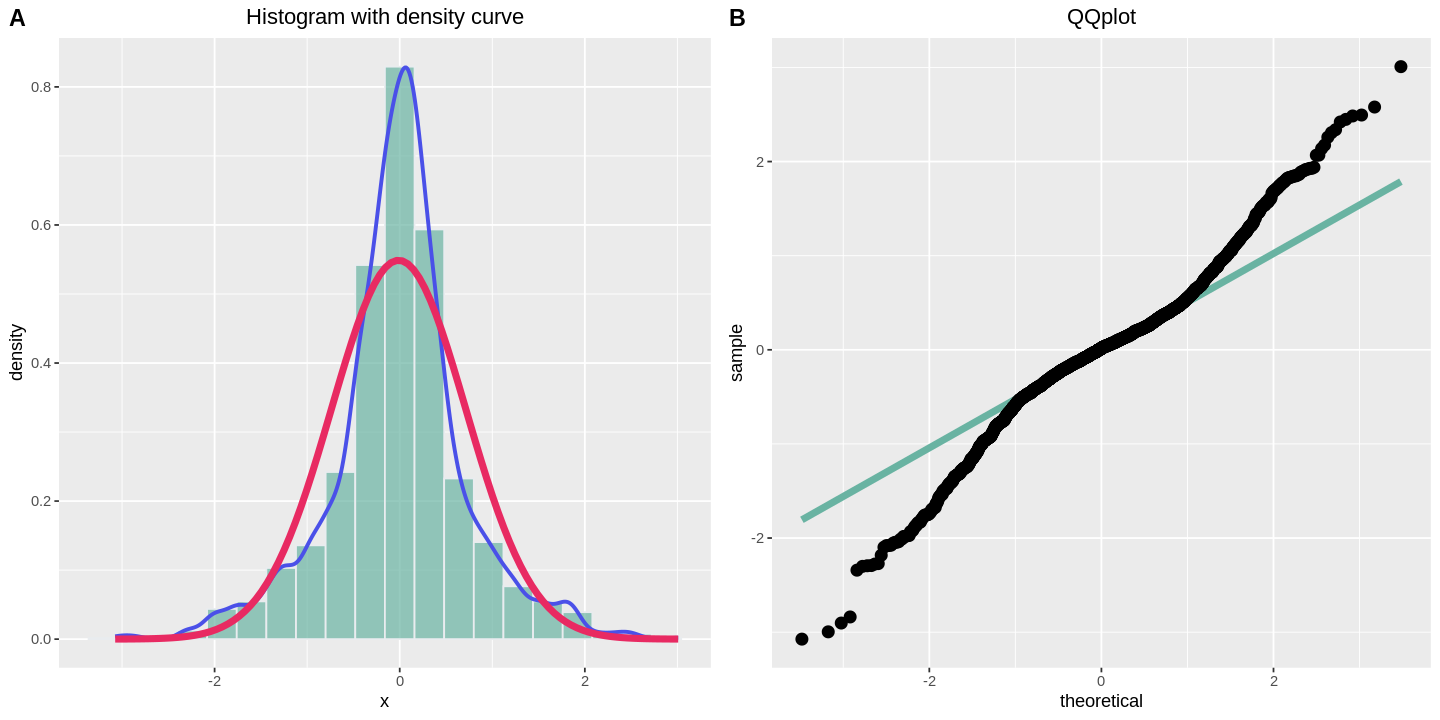

In [100]:
peaked_data <- c(normal_data, rnorm(1e3, 0, 0.3))
fig(12, 6)
plot_hist_qq(peaked_data)

**Exercise:**
<br>
Remember the sausage dataset? Load the dataset and do the visual normality test for each of the sausage type for the calories column.

<br>
<br>
data:
<br>

[sausage dataset](https://raw.githubusercontent.com/lich-uct/r_tutorial/56e08976134ebbfaa7739e244306650841c204a9/08/dogs.csv)

In [104]:
library(dplyr)


Attaching package: ‘dplyr’


The following object is masked from ‘package:car’:

    recode


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [126]:
url <- 'https://raw.githubusercontent.com/lich-uct/r_tutorial/56e08976134ebbfaa7739e244306650841c204a9/08/dogs.csv'
df <- read.table(url, sep=',', header=TRUE, stringsAsFactors=TRUE)

head(df)
summary(df)
levels(df$Type)

,Type,Calories,Sodium
,<fct>,<int>,<int>
1,Beef,186,495
2,Beef,181,477
3,Beef,176,425
4,Beef,149,322
5,Beef,184,482
6,Beef,190,587


      Type       Calories         Sodium     
 Beef   :20   Min.   : 86.0   Min.   :144.0  
 Meat   :17   1st Qu.:132.0   1st Qu.:362.5  
 Poultry:17   Median :145.0   Median :405.0  
              Mean   :145.4   Mean   :424.8  
              3rd Qu.:172.8   3rd Qu.:503.5  
              Max.   :195.0   Max.   :645.0  

[1] "Beef"    "Meat"    "Poultry"

In [130]:
cals_beef <- df[df$Type=='Beef',2]
cals_meat <- df[df$Type=='Meat',2]
cals_poultry <- df[df$Type=='Poultry',2]

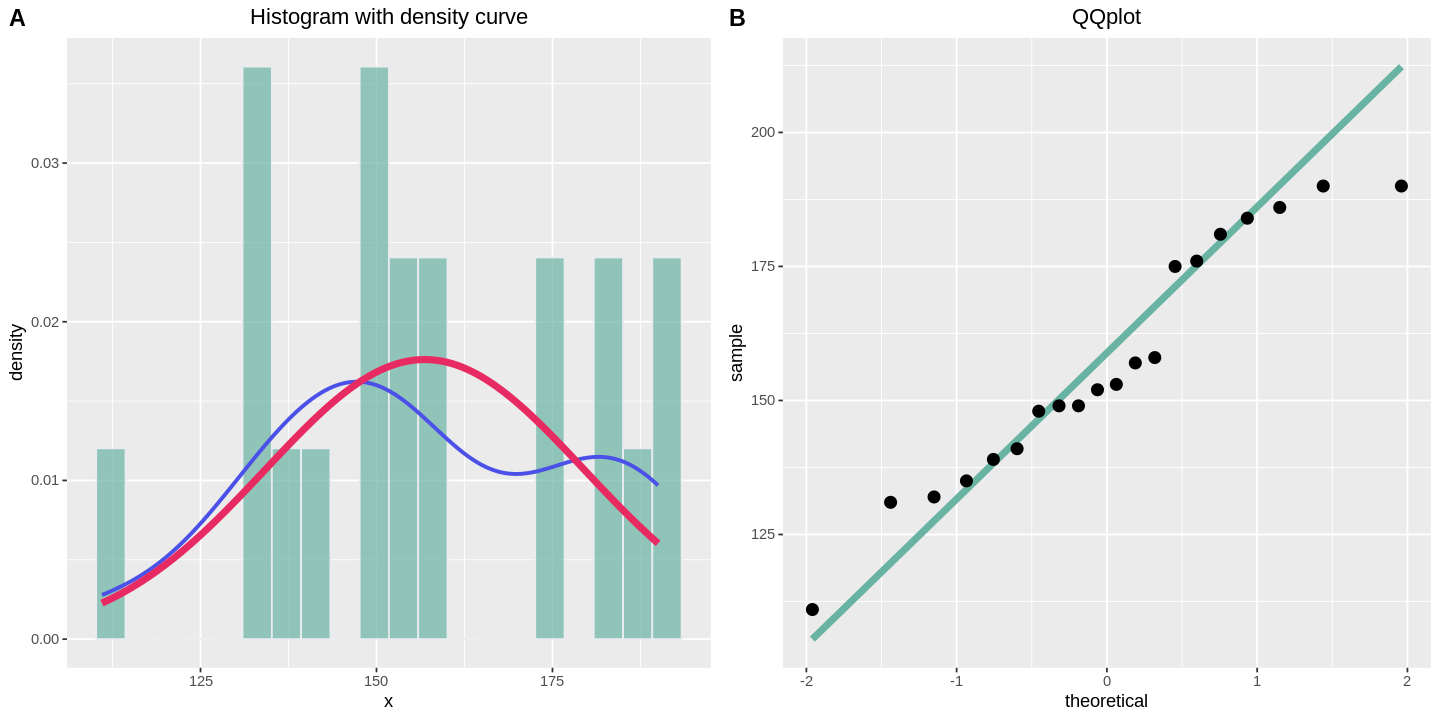

In [131]:
fig(12, 6)
plot_hist_qq(cals_beef)

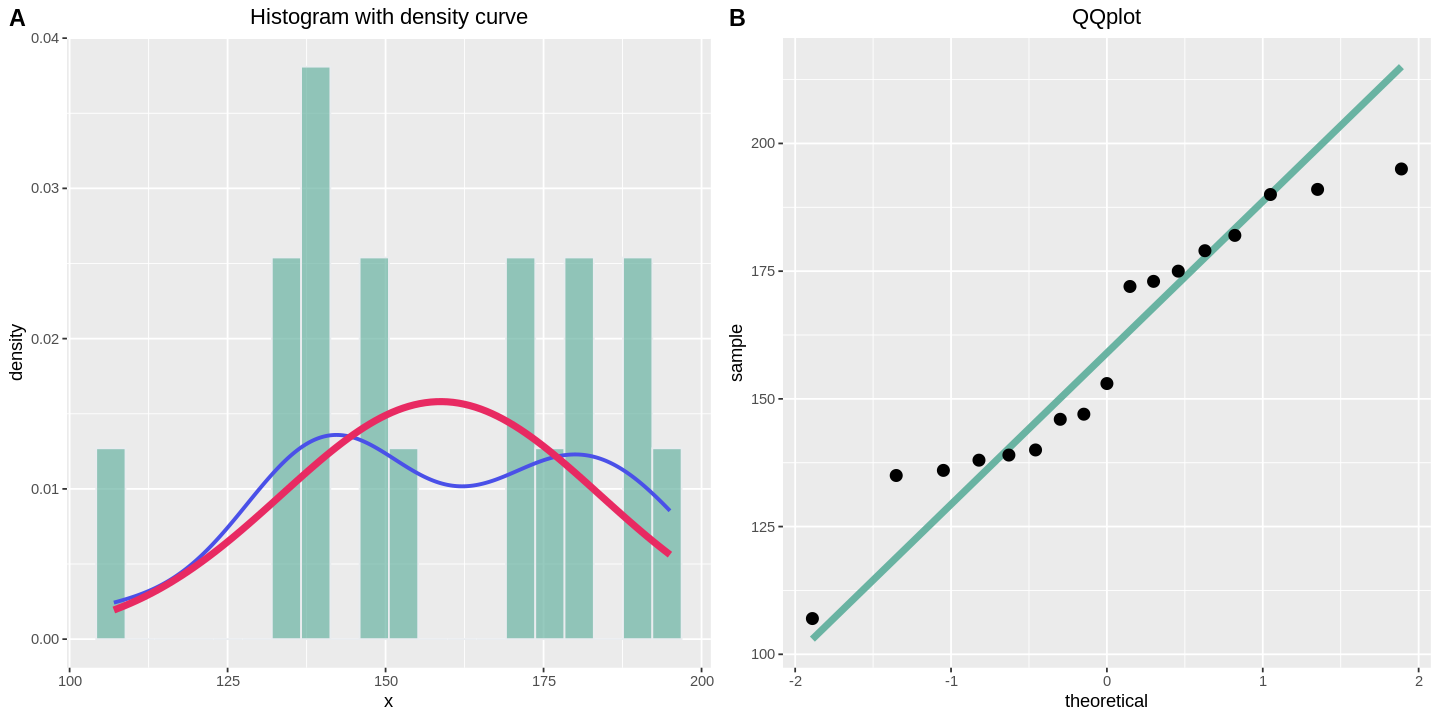

In [132]:
fig(12, 6)
plot_hist_qq(cals_meat)

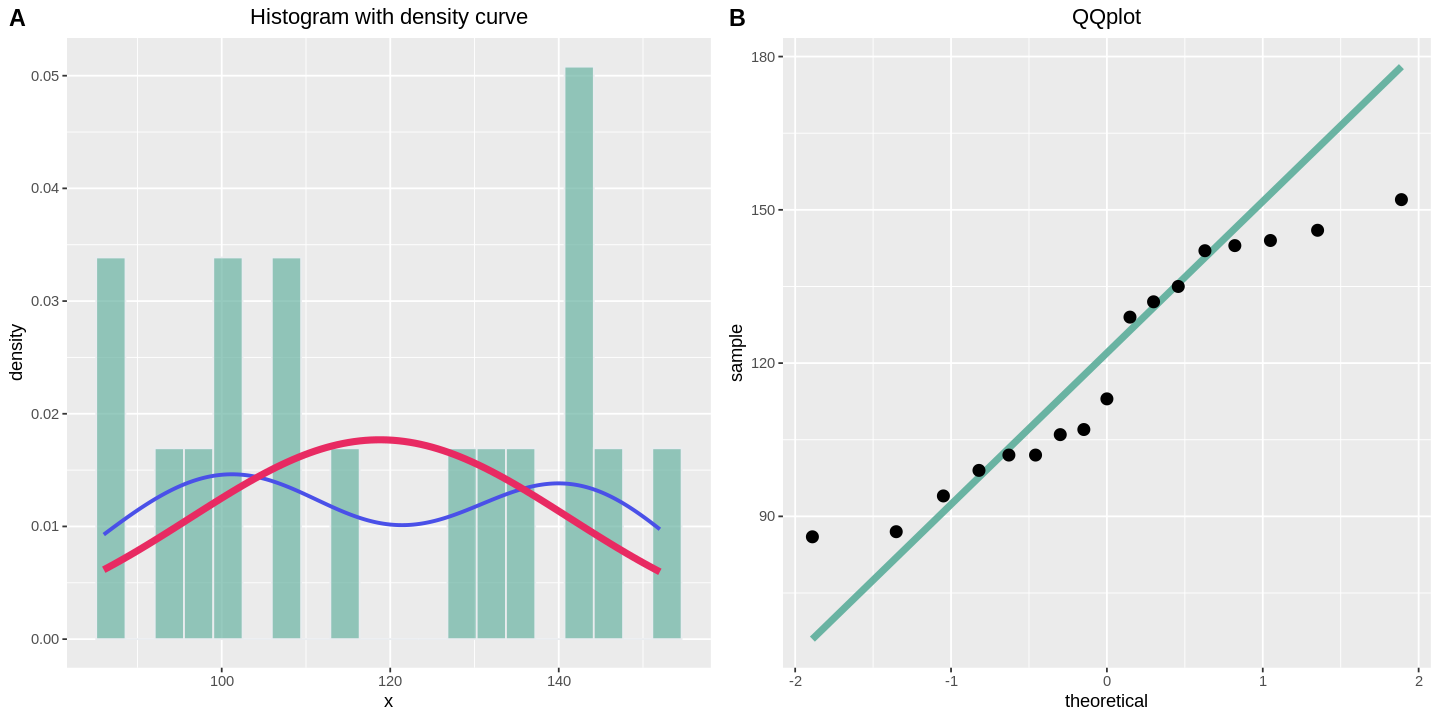

In [133]:
fig(12, 6)
plot_hist_qq(cals_poultry)

### Shapiro–Wilk test
**Statistical testing for normality**

In [134]:
shapiro.test(cals_beef)
shapiro.test(cals_meat)
shapiro.test(cals_poultry)


	Shapiro-Wilk normality test

data:  cals_beef
W = 0.94386, p-value = 0.2833



	Shapiro-Wilk normality test

data:  cals_meat
W = 0.92986, p-value = 0.2165



	Shapiro-Wilk normality test

data:  cals_poultry
W = 0.90844, p-value = 0.09414


The p-values came out non-significant, It cannot be said that our data is not normally distributed, but as with any statistical test, of course, the opposite cannot be claimed here. The normality of our data does not guarantee this result.

## 2. Homoscedasticity
Assumption of equality of random values variances
<br>
<br>
The Laven's test can be used to test for equality of variance in the samples under study; it tests the null hypothesis that the variances of the individual samples are equal against the alternative hypothesis that the differences in variances are statistically significant. This test is not a direct part of R and needs to be loaded from an external car package:

In [135]:
library('car')

leveneTest(df$Calories ~ df$Type)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,2,0.3645266,0.6963202
,51,NA,NA


This test was again non-significant (p-value ~ 0.7) and therefore we cannot say that the variances of our samples are significantly different. In this case it is a result we want to see to be able to proceed with using t-test for example.
in the case of the t-testing, if the results was significant, we should use Welch t-test: <br> 


```
t.test(x, y, var.equal = FALSE)
```



## 3. Data indepence

**Discrete values:** Chi-square test of independence
<br>
<br>
The chi-square test evaluates whether there is a significant association between the categories of the two variables. 
<br>
https://online.stat.psu.edu/stat200/book/export/html/230
<br>
<br>
<br>
**Continuous values**
<br>
This is more difficult problem and can be tackled with different approaches. One of them is
Hoeffding nonparametric test for the independence of two continuous variables using joint ranks to test H0:H(x,y)=F(x)G(y).
<br>
https://en.wikipedia.org/wiki/Hoeffding%27s_independence_test
<br>
In the R Hmisc package's hoeffd function can be used


# Statistical Power and Power Analysis 

Statistical power is the probability the test correctly rejects the null hypothesis. That means it is only relevant when the null hypothesis is rejected.
<br>
Statistical power = 1 - β (Type II error probability)

Oftentimes used power in studies is value of 0.8.


### small recap
<br>


*  p-value (p): Probability of obtaining a result equal or more extreme than was observed in the sampled data
*   Significance level - α: Threshold for specifying a statistically significant findings
*  Type I Error: Reject the null hypothesis when there is in no significant effect (false positive).
*  Type II Error: Fail to reject the null hypothesis when there is a significant effect (false negative). 








In [ ]:
# https://www.amazon.com/-/en/Paul-D-Ellis-ebook/dp/B004P1JFTM/ref=tmm_kin_swatch_0?_encoding=UTF8&qid=1523398057&sr=8-1
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7745163/

When the tests have low statistical power we are at large risk of getting Type II errors - false negatives.

**What factors does influence statistical power?**
<br>


*   Effect size
*   Sample size 
*   Significance level selection / test type selection



**Effect size**
<br>
Quantifies the magnitude of difference between populations

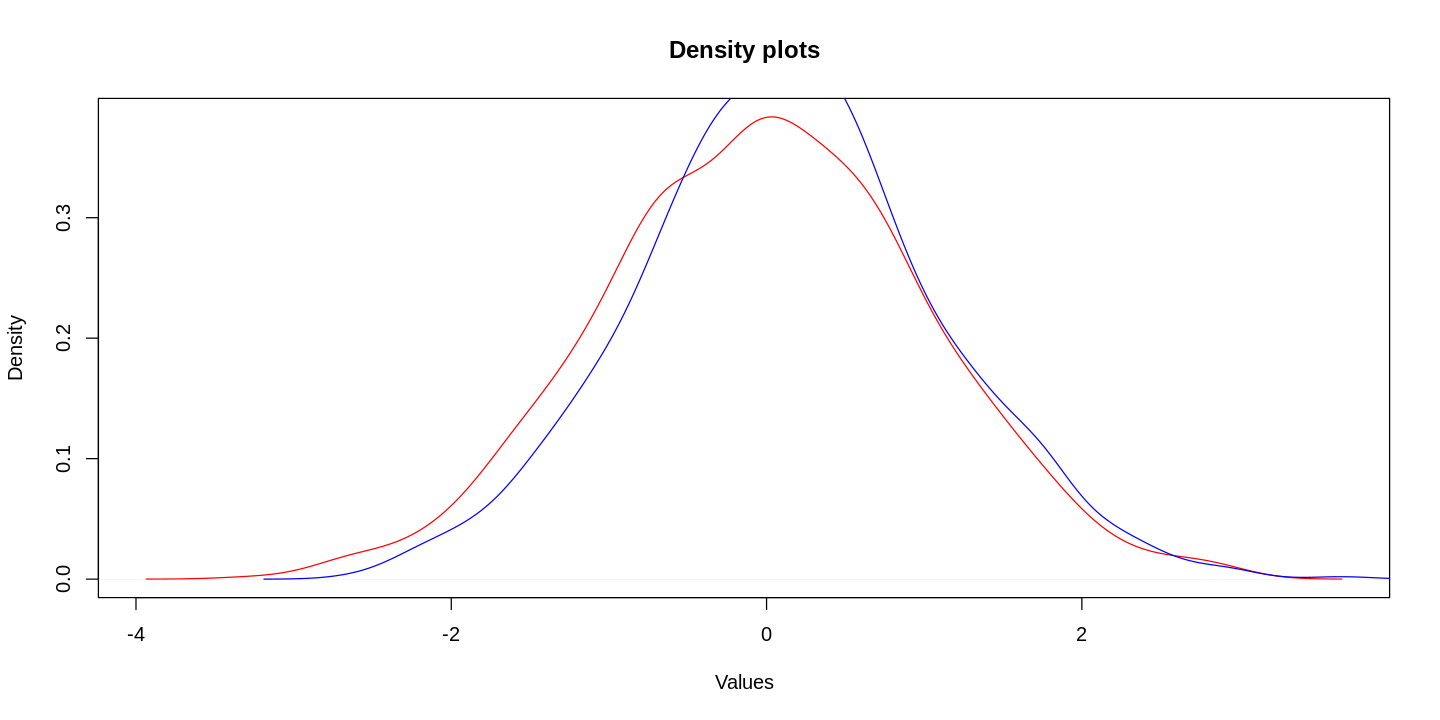

In [181]:
s1 <- rnorm(1e3, 0, 1)
s2 <- rnorm(1e3, 0.1, 1)
plot(density(s1), col='red', main='Density plots', xlab='Values')
lines(density(s2), col='blue')

In [182]:
t.test(s1, s2)


	Welch Two Sample t-test

data:  s1 and s2
t = -3.2718, df = 1988.3, p-value = 0.001087
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.23161777 -0.05800967
sample estimates:
  mean of x   mean of y 
-0.01355062  0.13126310 


We can see that these populations means differ, but how much practical is the effect of such a difference?
<br>
We can measure impact of a magnitude of a difference between two samples populations means using Cohonens d:
<br>
$
d = \frac{\bar{x_1} - \bar{x_2}}{s}
$
<br>

In [183]:
#install.packages('effsize')
library('effsize')

cohen.d(s1, s2)


Cohen's d

d estimate: -0.1463178 (negligible)
95 percent confidence interval:
      lower       upper 
-0.23414050 -0.05849518 


This result tell us that the effect is quite small - negligible. If the effect size was large the statistical power would grow. The strong effect threshold is d > 0.8. 
Intuitively when the difference between mean is small, which means we could reject the null hypothesis due to random noise.

**Sample size**
<br>
The number of observations in the sample.

**Significance**
<br>
The significance level α used in statistical test

In [162]:
# install.packages('pwr')
library('pwr')

# https://www.statmethods.net/stats/power.html

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



let's try on an example:
<br>
*   Experimental Determination of the Velocity of Light
<br>

[Velocity of Light](https://www.gutenberg.org/files/11753/11753-h/11753-h.htm)
<br>
[Michelson, Morley experiment - Wikipedia](https://en.wikipedia.org/wiki/Michelson%E2%80%93Morley_experiment)
<br>
*   Do robust estimators work with real data, Sigler
<br>

[Do robust estimators work with real data](http://darp.lse.ac.uk/PapersDB/Stigler_(AnnStat_77).pdf)


In [195]:
# notice the missing values
url <- 'https://raw.githubusercontent.com/lich-uct/r_tutorial/master/08/light_speed.csv'
df <- read.table(url, header=T)
head(df)
summary(df)

,Y1879,Y1882
,<int>,<int>
1,850,883
2,740,816
3,900,778
4,1070,796
5,930,682
6,850,711


     Y1879            Y1882       
 Min.   : 620.0   Min.   : 573.0  
 1st Qu.: 807.5   1st Qu.: 703.5  
 Median : 850.0   Median : 774.0  
 Mean   : 852.4   Mean   : 756.2  
 3rd Qu.: 892.5   3rd Qu.: 803.0  
 Max.   :1070.0   Max.   :1051.0  
                  NA's   :77      

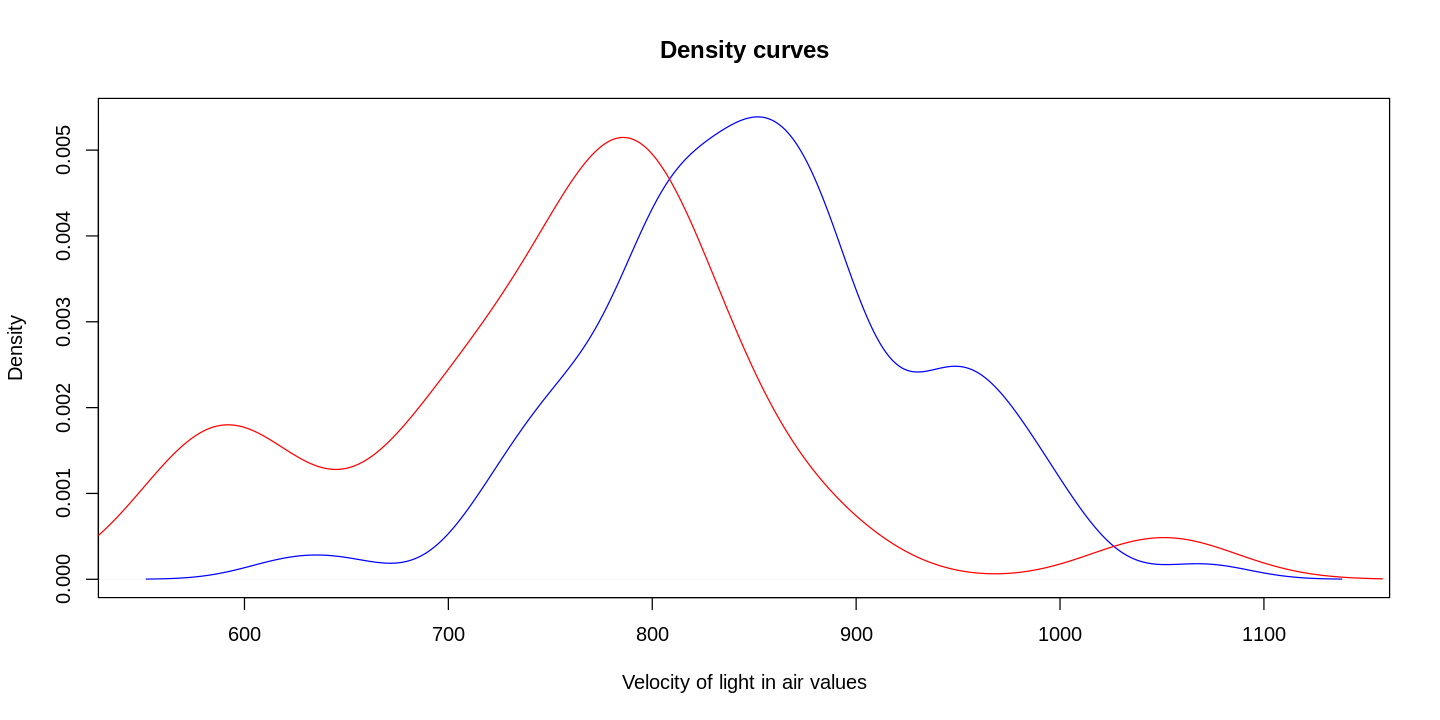

In [201]:
plot(density(df$Y1879), col='blue', main='Density curves', xlab='Velocity of light in air values')
lines(density(na.omit(df$Y1882)), col='red')

In [203]:
pwr.t2n.test(
    d = cohen.d(df$Y1879, na.omit(df$Y1882))$estimate,
    n1 = length(df$Y1879),
    n2 = length(na.omit(df$Y1882)),      
    sig.level = 0.01,
)


     t test power calculation 

             n1 = 100
             n2 = 23
              d = 1.134016
      sig.level = 0.01
          power = 0.9880958
    alternative = two.sided


The statistical power of given test is for this data quite large - almost 0.99, which is greater than 0.8. This result tells us the experiment is robust. Notice the high value of Cohonen's d = 1.54.

## Power analysis
### Sample size given statistical test and α

In [193]:
# d = 0.5 means medium effect 
pwr.t.test(
    n = NULL,
    d = 0.5, 
    sig.level = 0.01,
    power = 0.8
)


     Two-sample t test power calculation 

              n = 95.10364
              d = 0.5
      sig.level = 0.01
          power = 0.8
    alternative = two.sided

NOTE: n is number in *each* group


## P-Hacking
<br>
Don't do it, the universe deserves the truth
<br>

1. Running multiple test until we find samples that produce p-value lower than the significance level.
<br>
**Solution:** False discovery rate - adjusted p-values
2. Adding more observation
<br>
**Solution:** Do a power analysis to determin a correct sample size